Milestone Assignment 2: Principal Component Analysis (PCA)

QUESTION 1. PCA Implementation:
Utilize PCA to demonstrate how essential variables can be acquired from the cancer dataset available from sklearn.datasets.

In [ ]:
SOLUTION.

We will create a code to perform PCA on the breast cancer dataset from sklearn.datasets.
The task is to identify the number of principal components that will be needed to explain 95% of the variance and to reduce the dataset to these 
components. 

This process involves;
1.	Standardizing the Dataset’s features to have a mean of 0 and standard deviation of 1.
2.	Applying PCA to extract principal components.
3.	To calculate the Explained Variance ratio for each principal component.
4.	Determine Essential Variables: The cumulative variance is used to determine how many principal components are needed to explain at least 95% of 
    the variance.

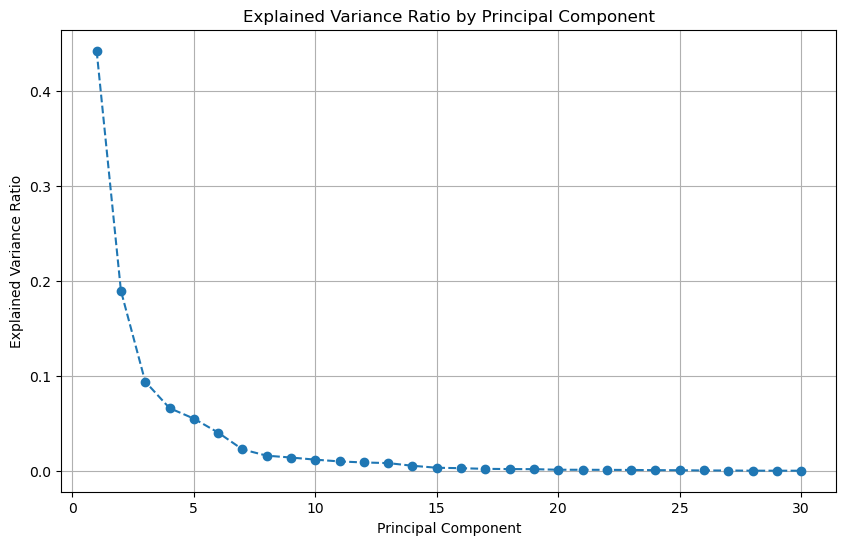

Number of components explaining 95% of the variance: 10
        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

        PC8       PC9      PC10  
0 -0.398407 -0.157118 -0.877402  
1  0.240988 -0.711905  1.106995  
2  0.097374  0.024066  0.454275  
3  1.059565 -1.405440 -1.116975  
4  0.636376 -0.263805  0.377704  


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Determine the number of components explaining most variance (e.g., 95%)
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, cum_var in enumerate(cumulative_variance_ratio) if cum_var >= 0.95) + 1
print(f"Number of components explaining 95% of the variance: {n_components}")

# Reduce data to the essential components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X_scaled)

# Display the principal components as a DataFrame
principal_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print(principal_df.head())


QUESTION 2. Dimensionality Reduction: Reduce the dataset into 2 PCA components for the project.

SOLUTION. 

We create another code to reduce the dataset to 2 PCA components and the results visualized in a scatter plot.

The process involves;
1.	Using StandardScaler to standardize the dataset ensuring each feature has a mean of 0 and standard deviation of 1.
2.	Apply PCA to reduce the features into 2 principal components.
3.	The explained variance ratio indicates how much variance is retained by each principal component.

        PC1        PC2
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072


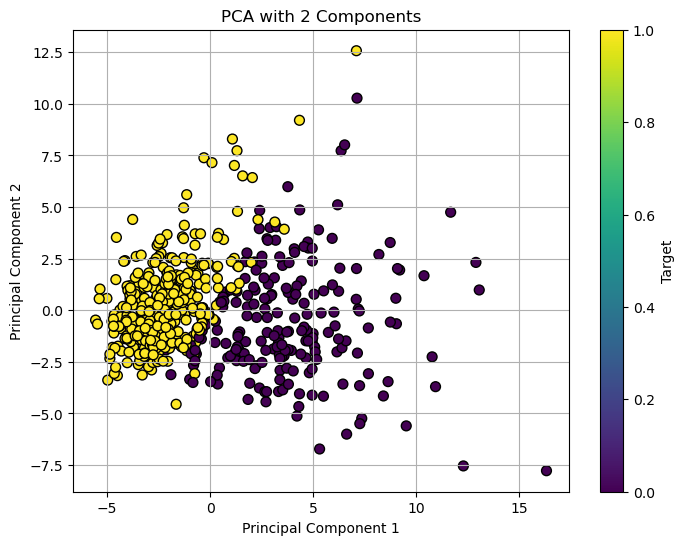

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce the dataset into 2 PCA components
pca_2_components = PCA(n_components=2)
X_2_components = pca_2_components.fit_transform(X_scaled)

# Display the two principal components as a DataFrame
principal_2_df = pd.DataFrame(X_2_components, columns=['PC1', 'PC2'])
print(principal_2_df.head())

# Plot the 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_2_components[:, 0], X_2_components[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA with 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()


QUESTION 3. Bonus Point (Optional): Implement logistic regression for prediction.

In [ ]:
SOLUTION.

We have now modified the code to include the implementation of logistic regression to predict the target variable based on the two PCA components, 
along with evaluation metrics. 

        PC1        PC2
0  9.192837   1.948583
1  2.387802  -3.768172
2  5.733896  -1.075174
3  7.122953  10.275589
4  3.935302  -1.948072


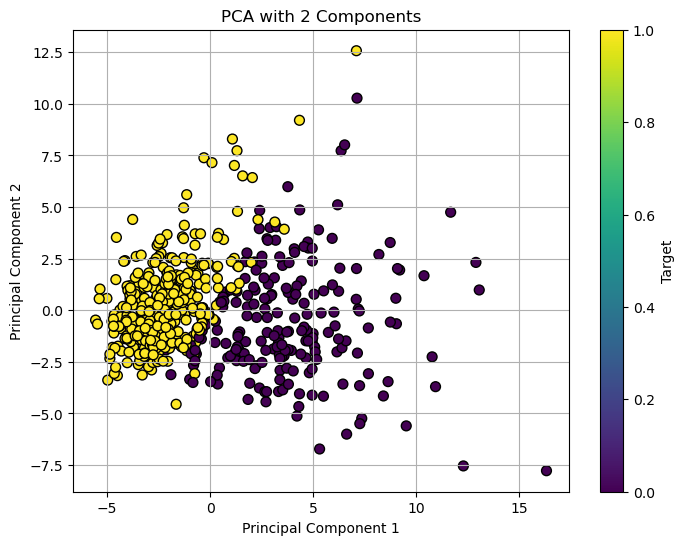

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce the dataset into 2 PCA components
pca_2_components = PCA(n_components=2)
X_2_components = pca_2_components.fit_transform(X_scaled)

# Display the two principal components as a DataFrame
principal_2_df = pd.DataFrame(X_2_components, columns=['PC1', 'PC2'])
print(principal_2_df.head())

# Plot the 2 components
plt.figure(figsize=(8, 6))
plt.scatter(X_2_components[:, 0], X_2_components[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA with 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2_components, y, test_size=0.2, random_state=42)

# Implement logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Summary: 

The PCA technique helps Anderson Cancer Center to manage the increasing number of referrals by efficiently performing the following task:
1.	Streamlining Data: PCA reduces complex, high-dimensional datasets to the most critical components, ensuring faster and more accurate processing of 
    referral data.
2.	Guiding Resource Allocation: Identifying key factors influencing patient outcomes, aids in prioritizing urgent cases and optimizing resource use.
3.	Improving Predictions: Simplified, noise-free data enhances the performance of predictive models, supporting better decisions-making about patient 
    care and urgency.
4.	Handling Growth: The reduced dataset scales effectively, maintaining performance even as referral numbers increase.
5.	Uncovering Patterns: PCA reveals trends and clusters in referral data, enabling strategic workflow improvements and enhanced patient care.
